# **1. Introduction :**
# About LoanTap
> LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

> The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

> LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

        - Personal Loan
        - EMI Free Loan
        - Personal Overdraft
        - Advance Salary Loan

> This case study will focus on the underwriting process behind Personal Loan only



# Business Problem:
> Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

# Dataset
> Dataset Link: [LoanTapData.csv](https://drive.google.com/file/d/1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d/view?usp=sharing)

# Data dictionary:

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : Institution assigned loan grade
6. sub_grade : Institution assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by Institution, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested Institution loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spy

#Seting option for full column view of Data
pd.set_option('display.max_columns', None)

#Stats & model building
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# hide warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Scalar_CSV_Files/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


#**2.EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
i = 0
o = 0
b = 0
for col in df.columns:
  if (df[col].dtypes == "float64" or df[col].dtypes == 'int64'):
    i=i+1
  elif  df[col].dtypes == 'object':
    o = o + 1
  elif df[col].dtypes == 'bool':
    b = b + 1

print("No of Intrger columns : ",i)
print("No of Object columns : ",o)
print("No of Boolean columns : ",b)

No of Intrger columns :  12
No of Object columns :  15
No of Boolean columns :  0


In [ ]:
print("Shape of the Dataframe:")
print("Rows : ",df.shape[0])
print("Columns : ",df.shape[1])

Shape of the Dataframe:
Rows :  396030
Columns :  27


Insights:
There are 396030 rows and 27 columns in the data frame.

In [ ]:
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
Fully Paid,0.803871
Charged Off,0.196129


Insights:
As per the output it is clear that the data is imbalanced.

##**2.1 Statistical Summary**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


##**2.2 Detect Correlation**

In [ ]:
data  = df.select_dtypes(include='float64')

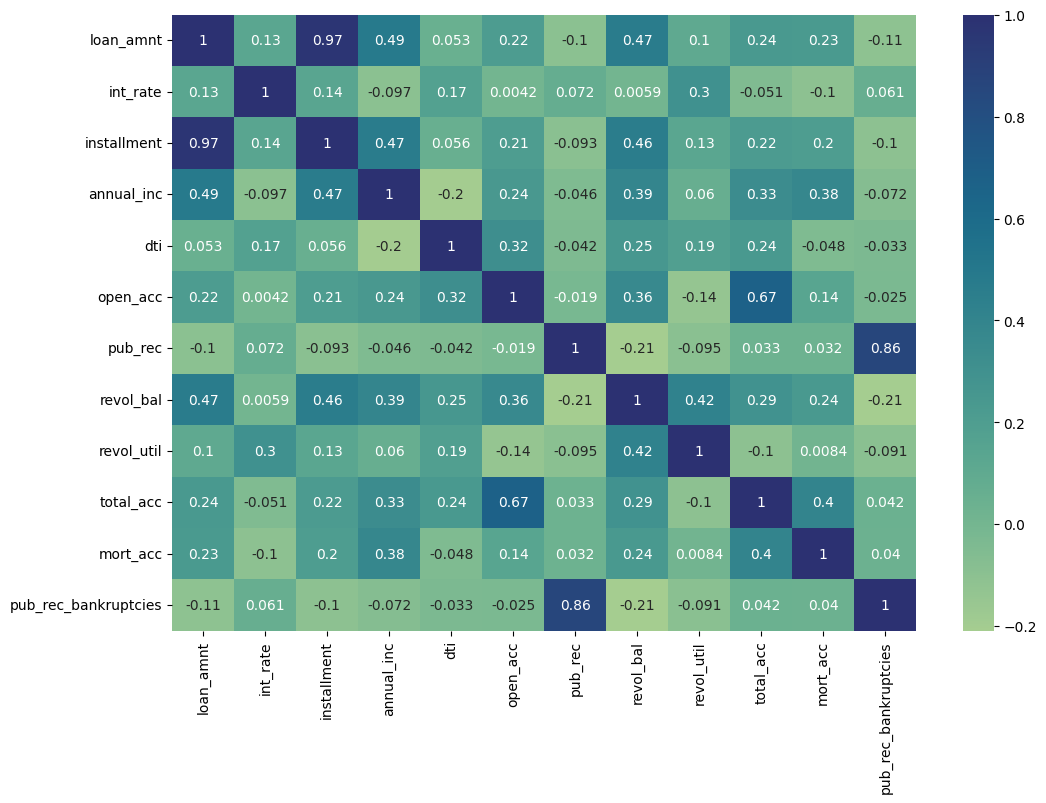

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='spearman'),cmap="crest",annot=True)
plt.show()

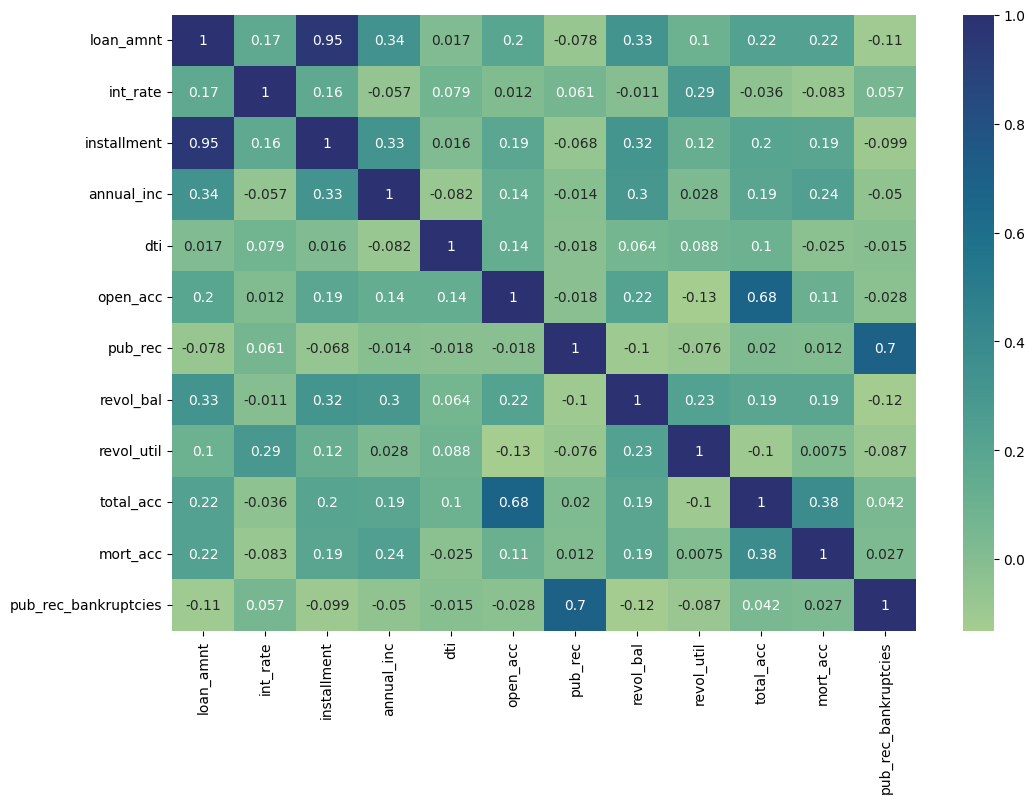

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='pearson'),cmap="crest",annot=True)
plt.show()

Insights:
As per the heatmaps we can see that installment and


*   pub_rec_bankruptcies and installment are highly correlated.
*   loan_amt and installment are also highly correlated.
*   pub_rec and pub_rec_bankruptcies are also correlated.

In [ ]:
#Dropping the installment column for now
df.drop(columns=['installment'],axis=1,inplace=True)

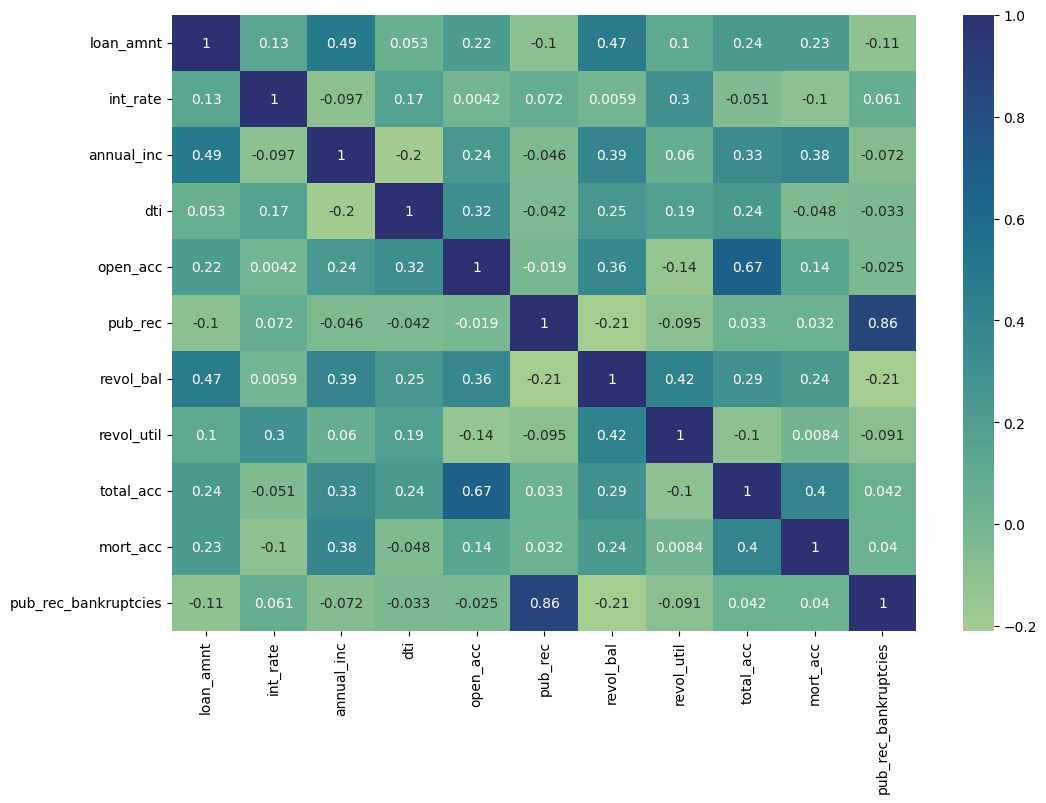

In [ ]:
data  = df.select_dtypes(include='float64')
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='spearman'),cmap="crest",annot=True)
plt.show()

##**2.3 Changing Data Types**

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
#Change the datetime datatype
df["issue_d"] = pd.to_datetime(df["issue_d"])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [ ]:
#Converting employment length to numeric
def change(x):
    if x == '1 year':
      return 1
    elif x == '5 years':
      return 5
    elif x == '7 years':
      return 7
    elif x == '8 years':
      return 8
    elif x == '3 years':
      return 3
    elif x == '2 years':
      return 2
    elif x == '9 years':
      return 9
    elif x == '6 years':
      return 6
    elif x == '< 1 year':
      return 0
    elif x == '4 years':
      return 4
    else:
      return 10

df["emp_length"] = df["emp_length"].apply(change)

In [ ]:
#Converting term to numeric
d = {' 36 months':36, ' 60 months':60}
df['term']=df['term'].replace(d).astype('int')

In [ ]:
#Converting columns to categorical having unique values <14
columns = list()
for x in df.columns:
  if df[x].nunique() <=14:
    columns.append(x)
print(columns)
df[columns] = df[columns].astype('category')

['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'pub_rec_bankruptcies']


##**2.4 Data Exploration**

In [ ]:
df.groupby(by='loan_status').loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Insights:
Among all the people who took loan, fully paid are 318357 and charged off are 77673. So, most people have fully paid the loans.

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


In [ ]:
df.loc[(df['home_ownership'] == 'NONE') | (df['home_ownership'] == 'ANY'), 'home_ownership'] = 'OTHER'
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,146
ANY,0
NONE,0


In [ ]:
df.loc[df['home_ownership'] == 'OTHER',['loan_status']].value_counts(normalize=True)

,proportion
loan_status,
Fully Paid,0.842466
Charged Off,0.157534


Insights:
People under OTHER catagories have mostly paid the loans(about 84.24%)

In [ ]:
#df['title'] =
df['title'].str.replace(" ","")

,title
0,Vacation
1,Debtconsolidation
2,Creditcardrefinancing
3,Creditcardrefinancing
4,CreditCardRefinance
...,...
396025,Debtconsolidation
396026,Debtconsolidation
396027,payoffcreditcards
396028,Loanforpayoff


In [ ]:
df['title'] = df['title'].str.lower()

In [ ]:
df['title'].value_counts()

,count
title,
debt consolidation,168108
credit card refinancing,51781
home improvement,17117
other,12993
consolidation,5583
...,...
sweet,1
mortgage convertion,1
debt consolidation and relocation,1


Insights:
Converted the titles under same format as some of the values are having some issue wrt to case,spaces etc.

## **2.6 Checking for Null values :**

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
mort_acc,37795
emp_title,22927
title,1756
pub_rec_bankruptcies,535
revol_util,276
dti,0
application_type,0
initial_list_status,0
total_acc,0
revol_bal,0


**Insights:**

*  Missing values have been detected in 5 columns

These null values needs to be treated.

# **3. Univariate Analysis:**

## **3.1 Numerical Columns :**

In [ ]:
numeric_columns = list(df.select_dtypes(include=["int", "float"]).columns)
print(numeric_columns)

['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']


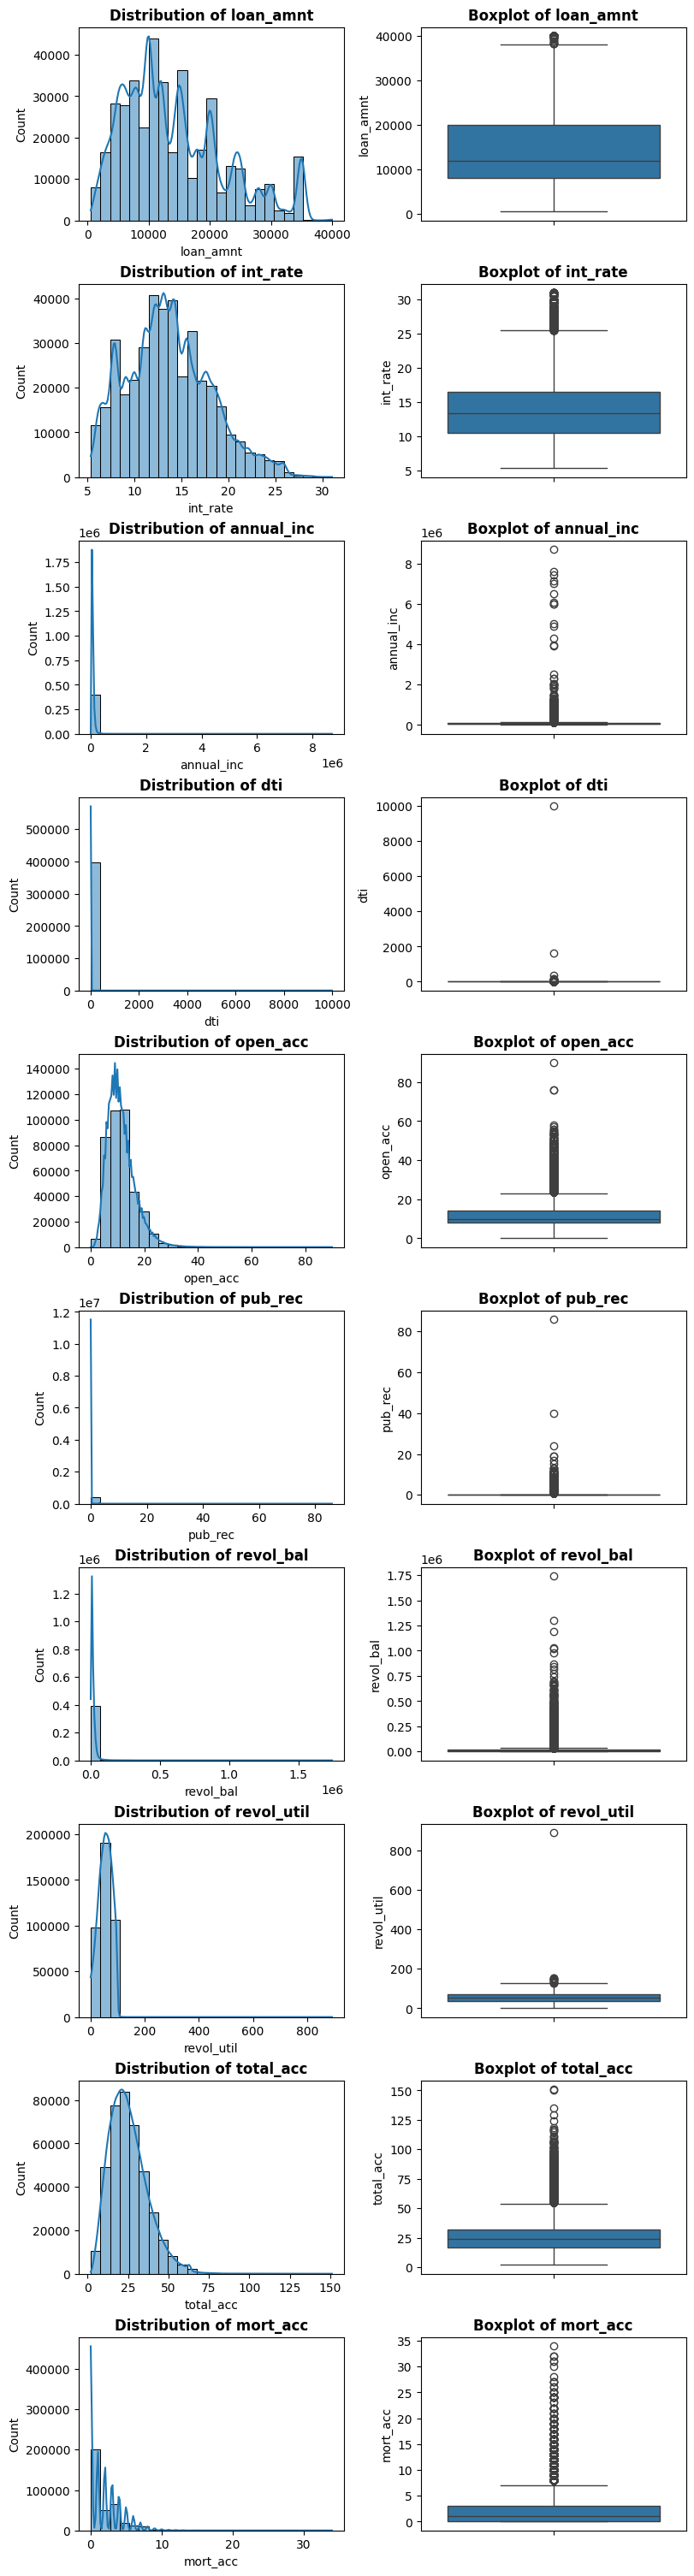

In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(8, 30), layout = 'constrained')

for i in range(len(numeric_columns)):
    sns.histplot(x=df[numeric_columns[i]], kde=True, bins = 25, ax=ax[i, 0])
    ax[i, 0].set_title(f"Distribution of {numeric_columns[i]}",{'weight':'bold'})

    sns.boxplot(y = df[numeric_columns[i]], ax=ax[i, 1], data=df)
    ax[i, 1].set_title(f"Boxplot of {numeric_columns[i]}",{'weight':'bold'})

plt.show()

Insights :


*   Most of the distribution are right skewed.
*   The box plots indicates lot of outliers.

## **3.2 Categorical Columns :**

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,B,B4,Marketing,10,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,B,B5,Credit analyst,4,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,B,B3,Statistician,0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,A,A2,Client Advocate,6,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,credit card refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df['pub_rec_bankruptcies'].dtype

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], ordered=False, categories_dtype=float64)

In [ ]:
category_columns = list(df.select_dtypes(include=["category"]).columns)
print(category_columns)

['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'pub_rec_bankruptcies']


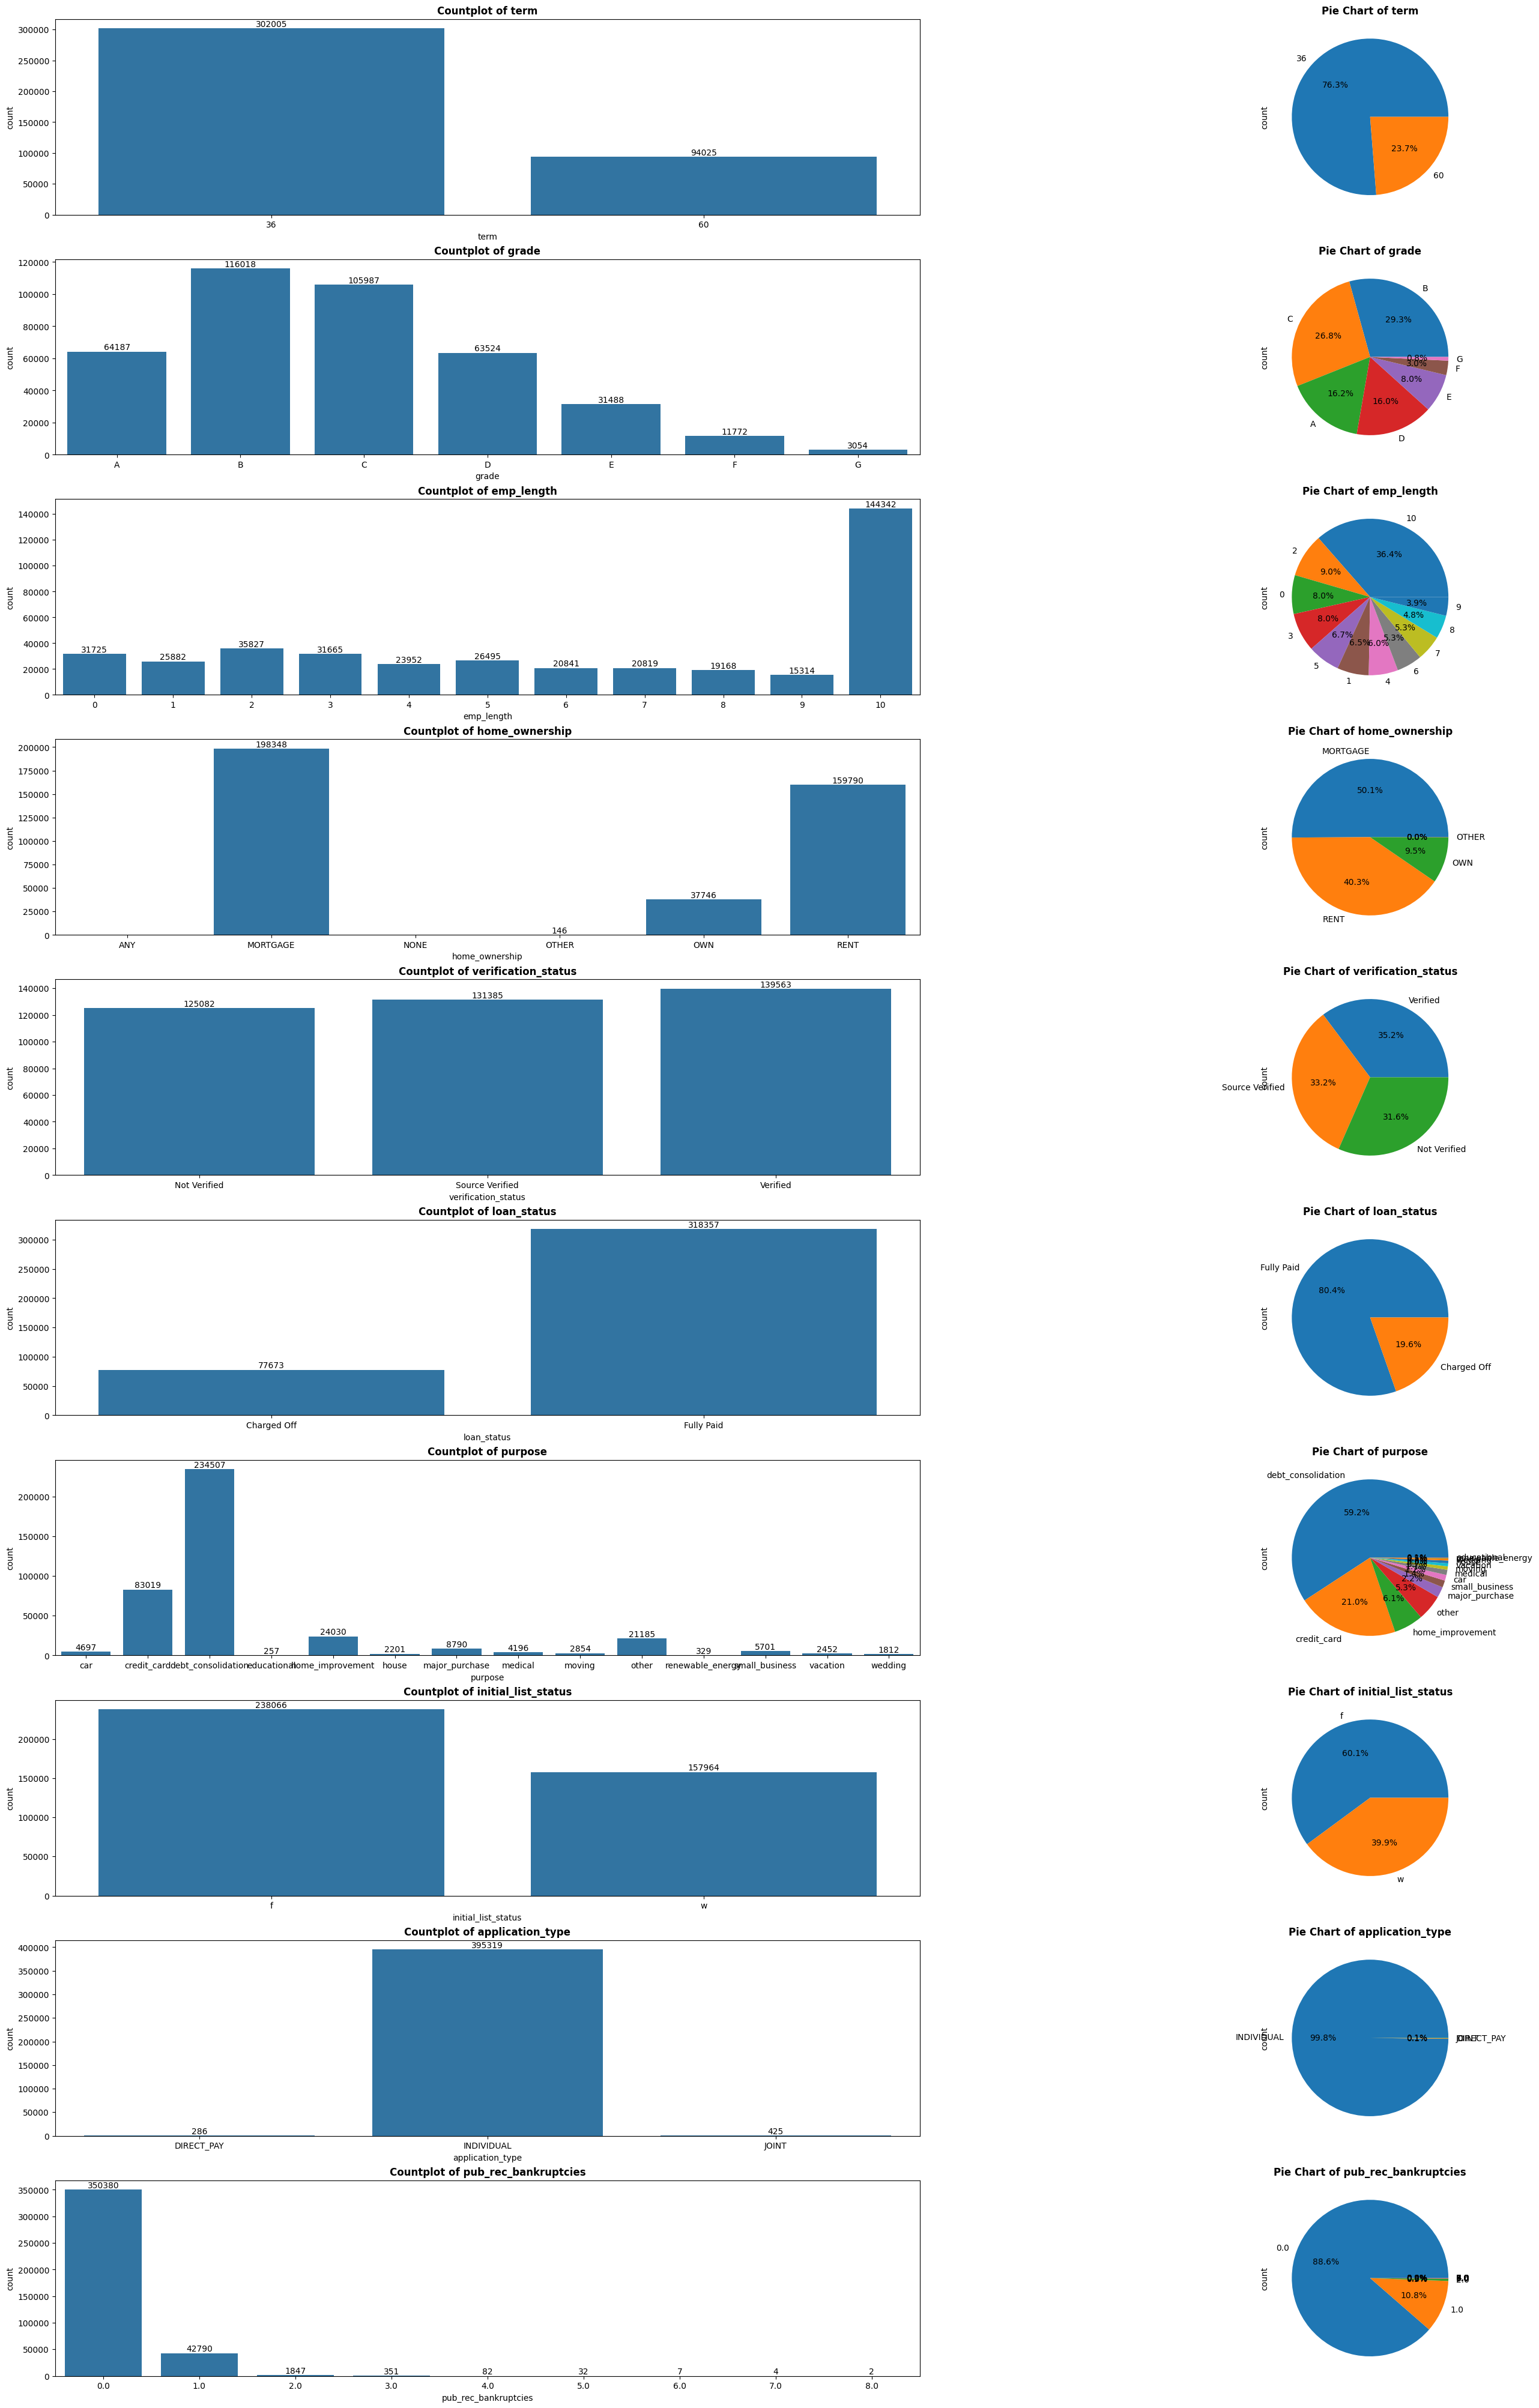

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=len(category_columns), ncols=2, figsize=(30, 40), layout='constrained')

for i in range(len(category_columns)):
    # Adjust bar width
    data = sns.countplot(data=df, x=df[category_columns[i]], ax=ax[i, 0])
    for label in data.containers:
        data.bar_label(label)
    ax[i, 0].set_title(f"Countplot of {category_columns[i]}", {'weight': 'bold'})

    # Pie Chart
    df[category_columns[i]].value_counts().plot.pie(autopct='%.1f%%', ax=ax[i, 1])
    ax[i, 1].set_title(f"Pie Chart of {category_columns[i]}", {'weight': 'bold'})

plt.show()

Insights :

*  Around  76.3.% people took loan for months.
*  Most people who took loan are of grade B and C.
*  Most of the applicants have mortgaged their home.
*  Income of most of the applicants are verified.
*  People took loan for debt consolidation.


# **4. Bivariate Analysis :**

4.1 Numerical Columns :

In [ ]:
list(df.select_dtypes(include=["int","float"]).columns)

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc']

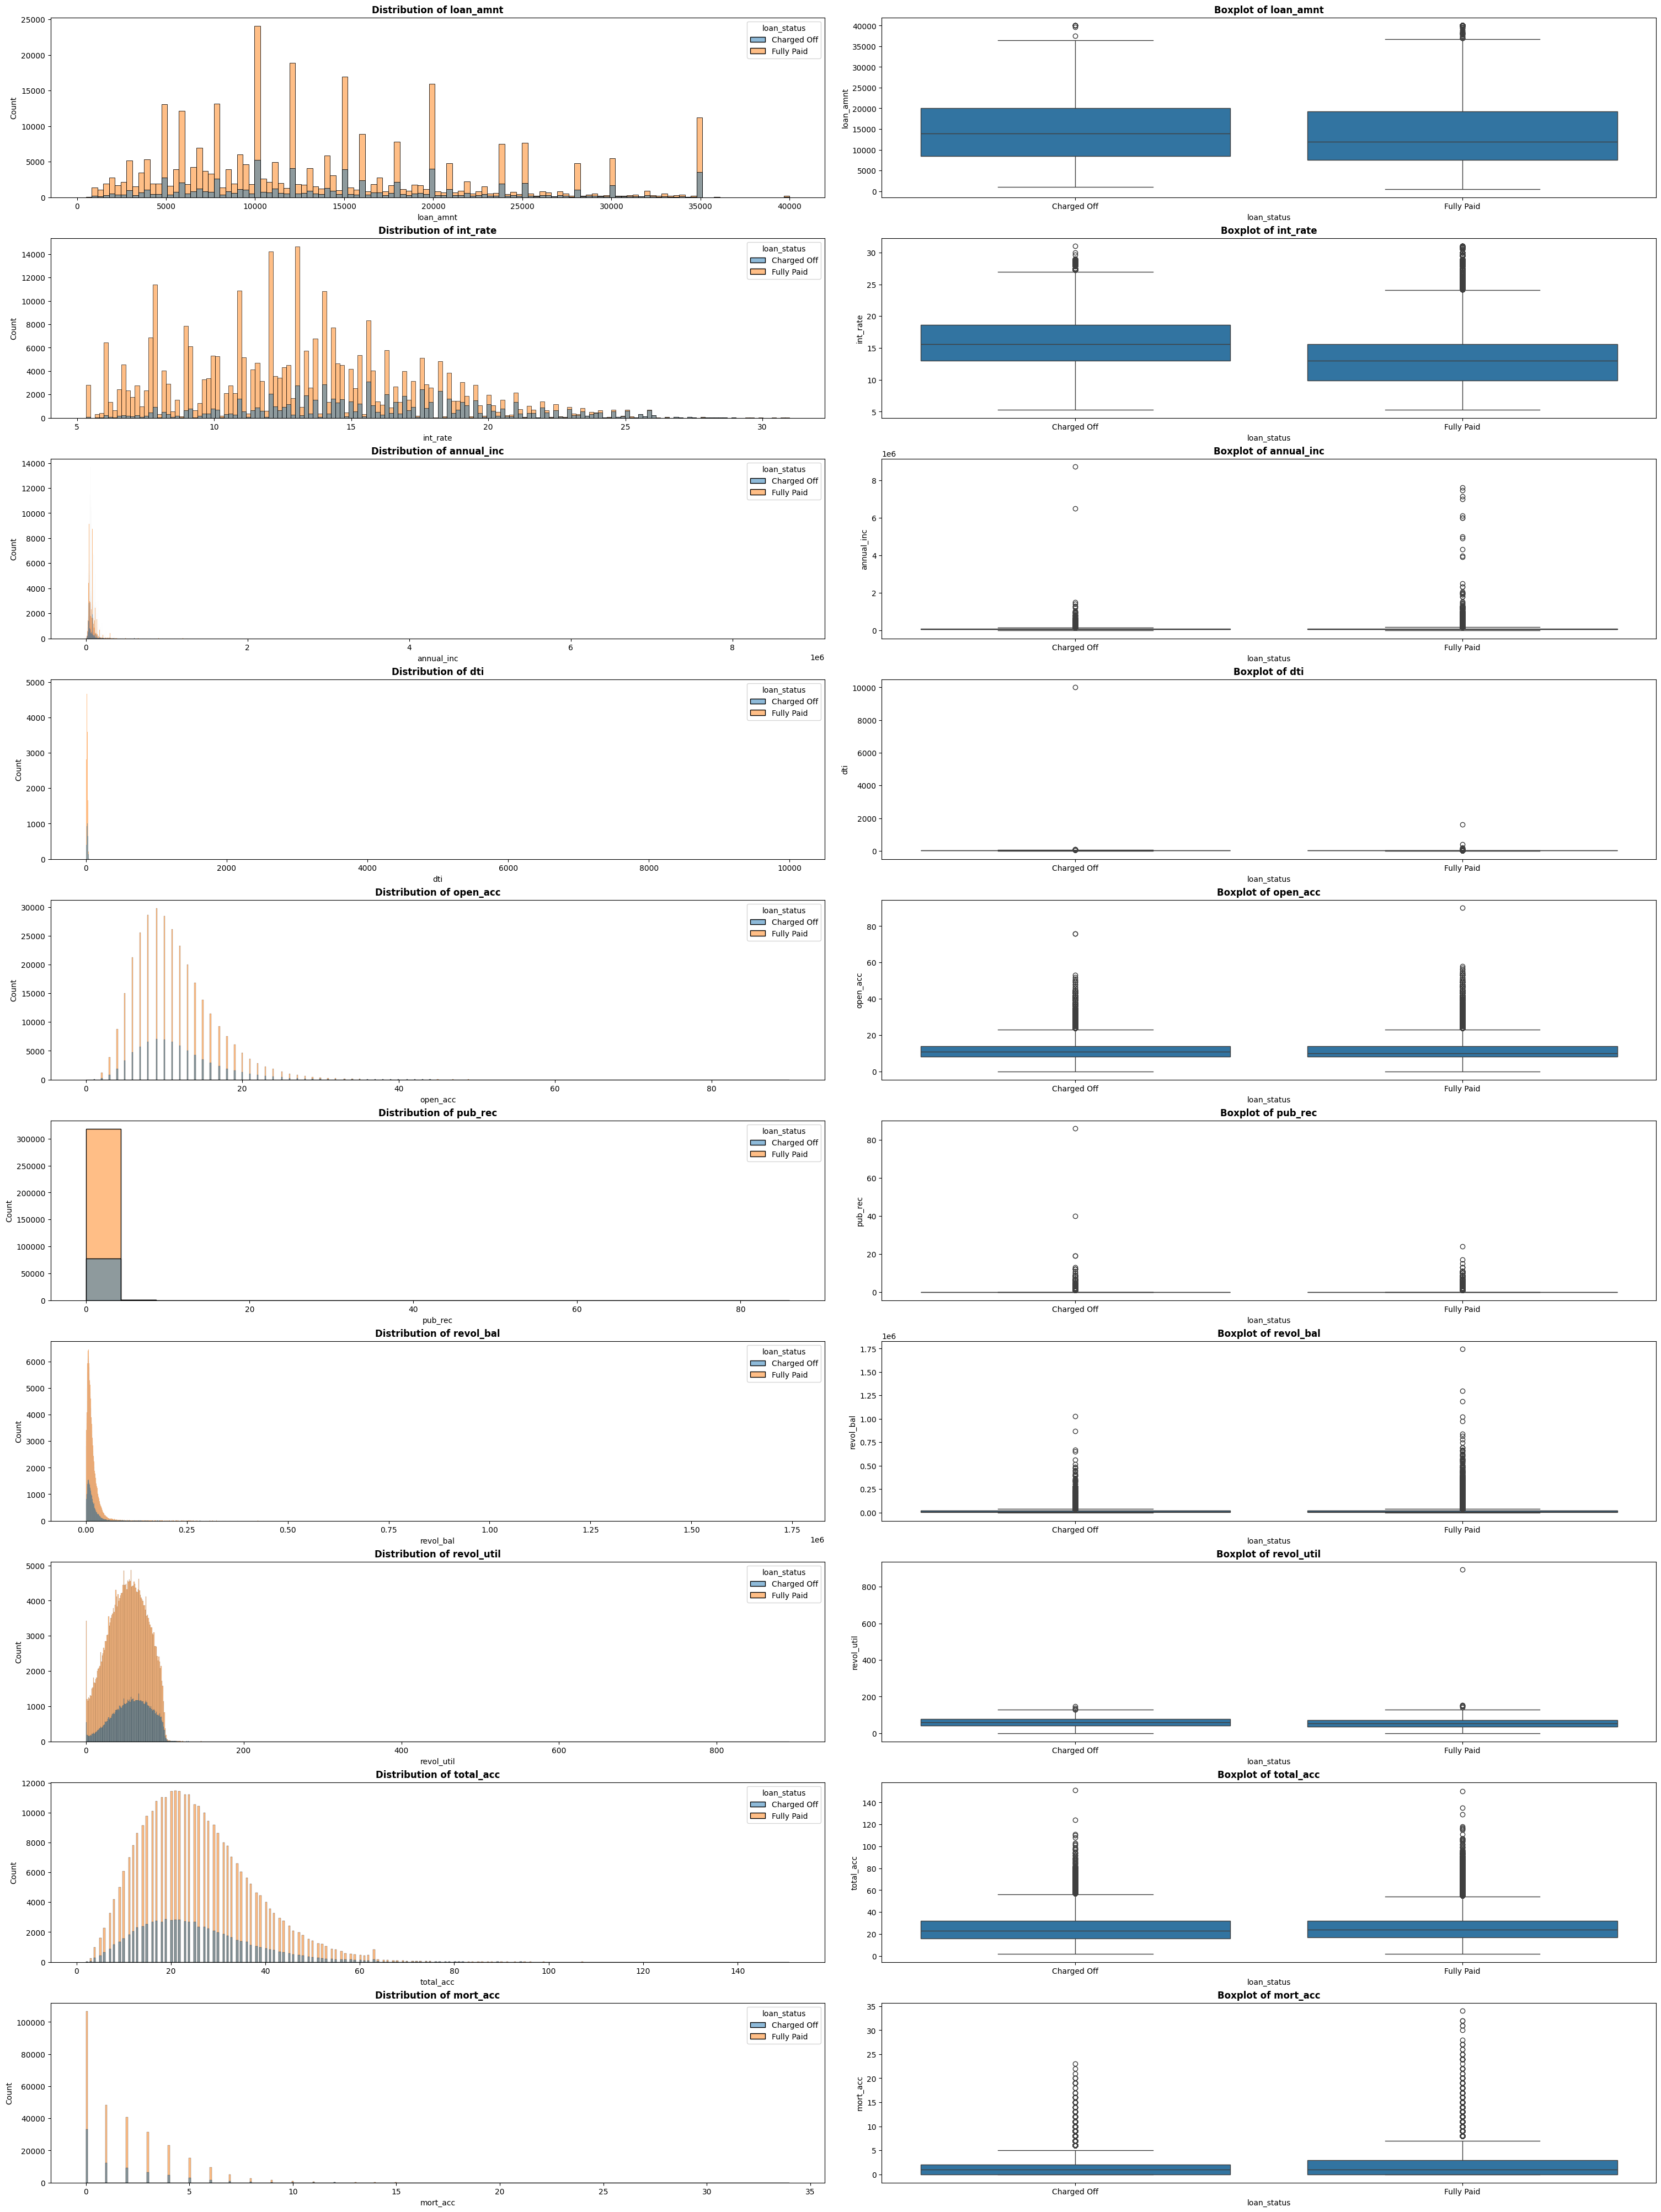

In [ ]:
# Impact of numerical features on loan_status
numeric_columns = list(df.select_dtypes(include=["int","float"]).columns)
l = len(numeric_columns)
fig, ax = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(30, 40), layout='constrained')
i=0

for i in range(l):
    sns.histplot(data=df,x=df[numeric_columns[i]], hue='loan_status', ax=ax[i, 0],fill=True)
    ax[i, 0].set_title(f"Distribution of {numeric_columns[i]}",{'weight':'bold'})

    sns.boxplot(y = df[numeric_columns[i]],x='loan_status', ax=ax[i, 1], data=df)
    ax[i, 1].set_title(f"Boxplot of {numeric_columns[i]}",{'weight':'bold'})

plt.show()


##**4.2 Categorical Columns :**

In [ ]:
category_columns = list(df.select_dtypes(include=["category"]).columns)
print(category_columns)

['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'pub_rec_bankruptcies']


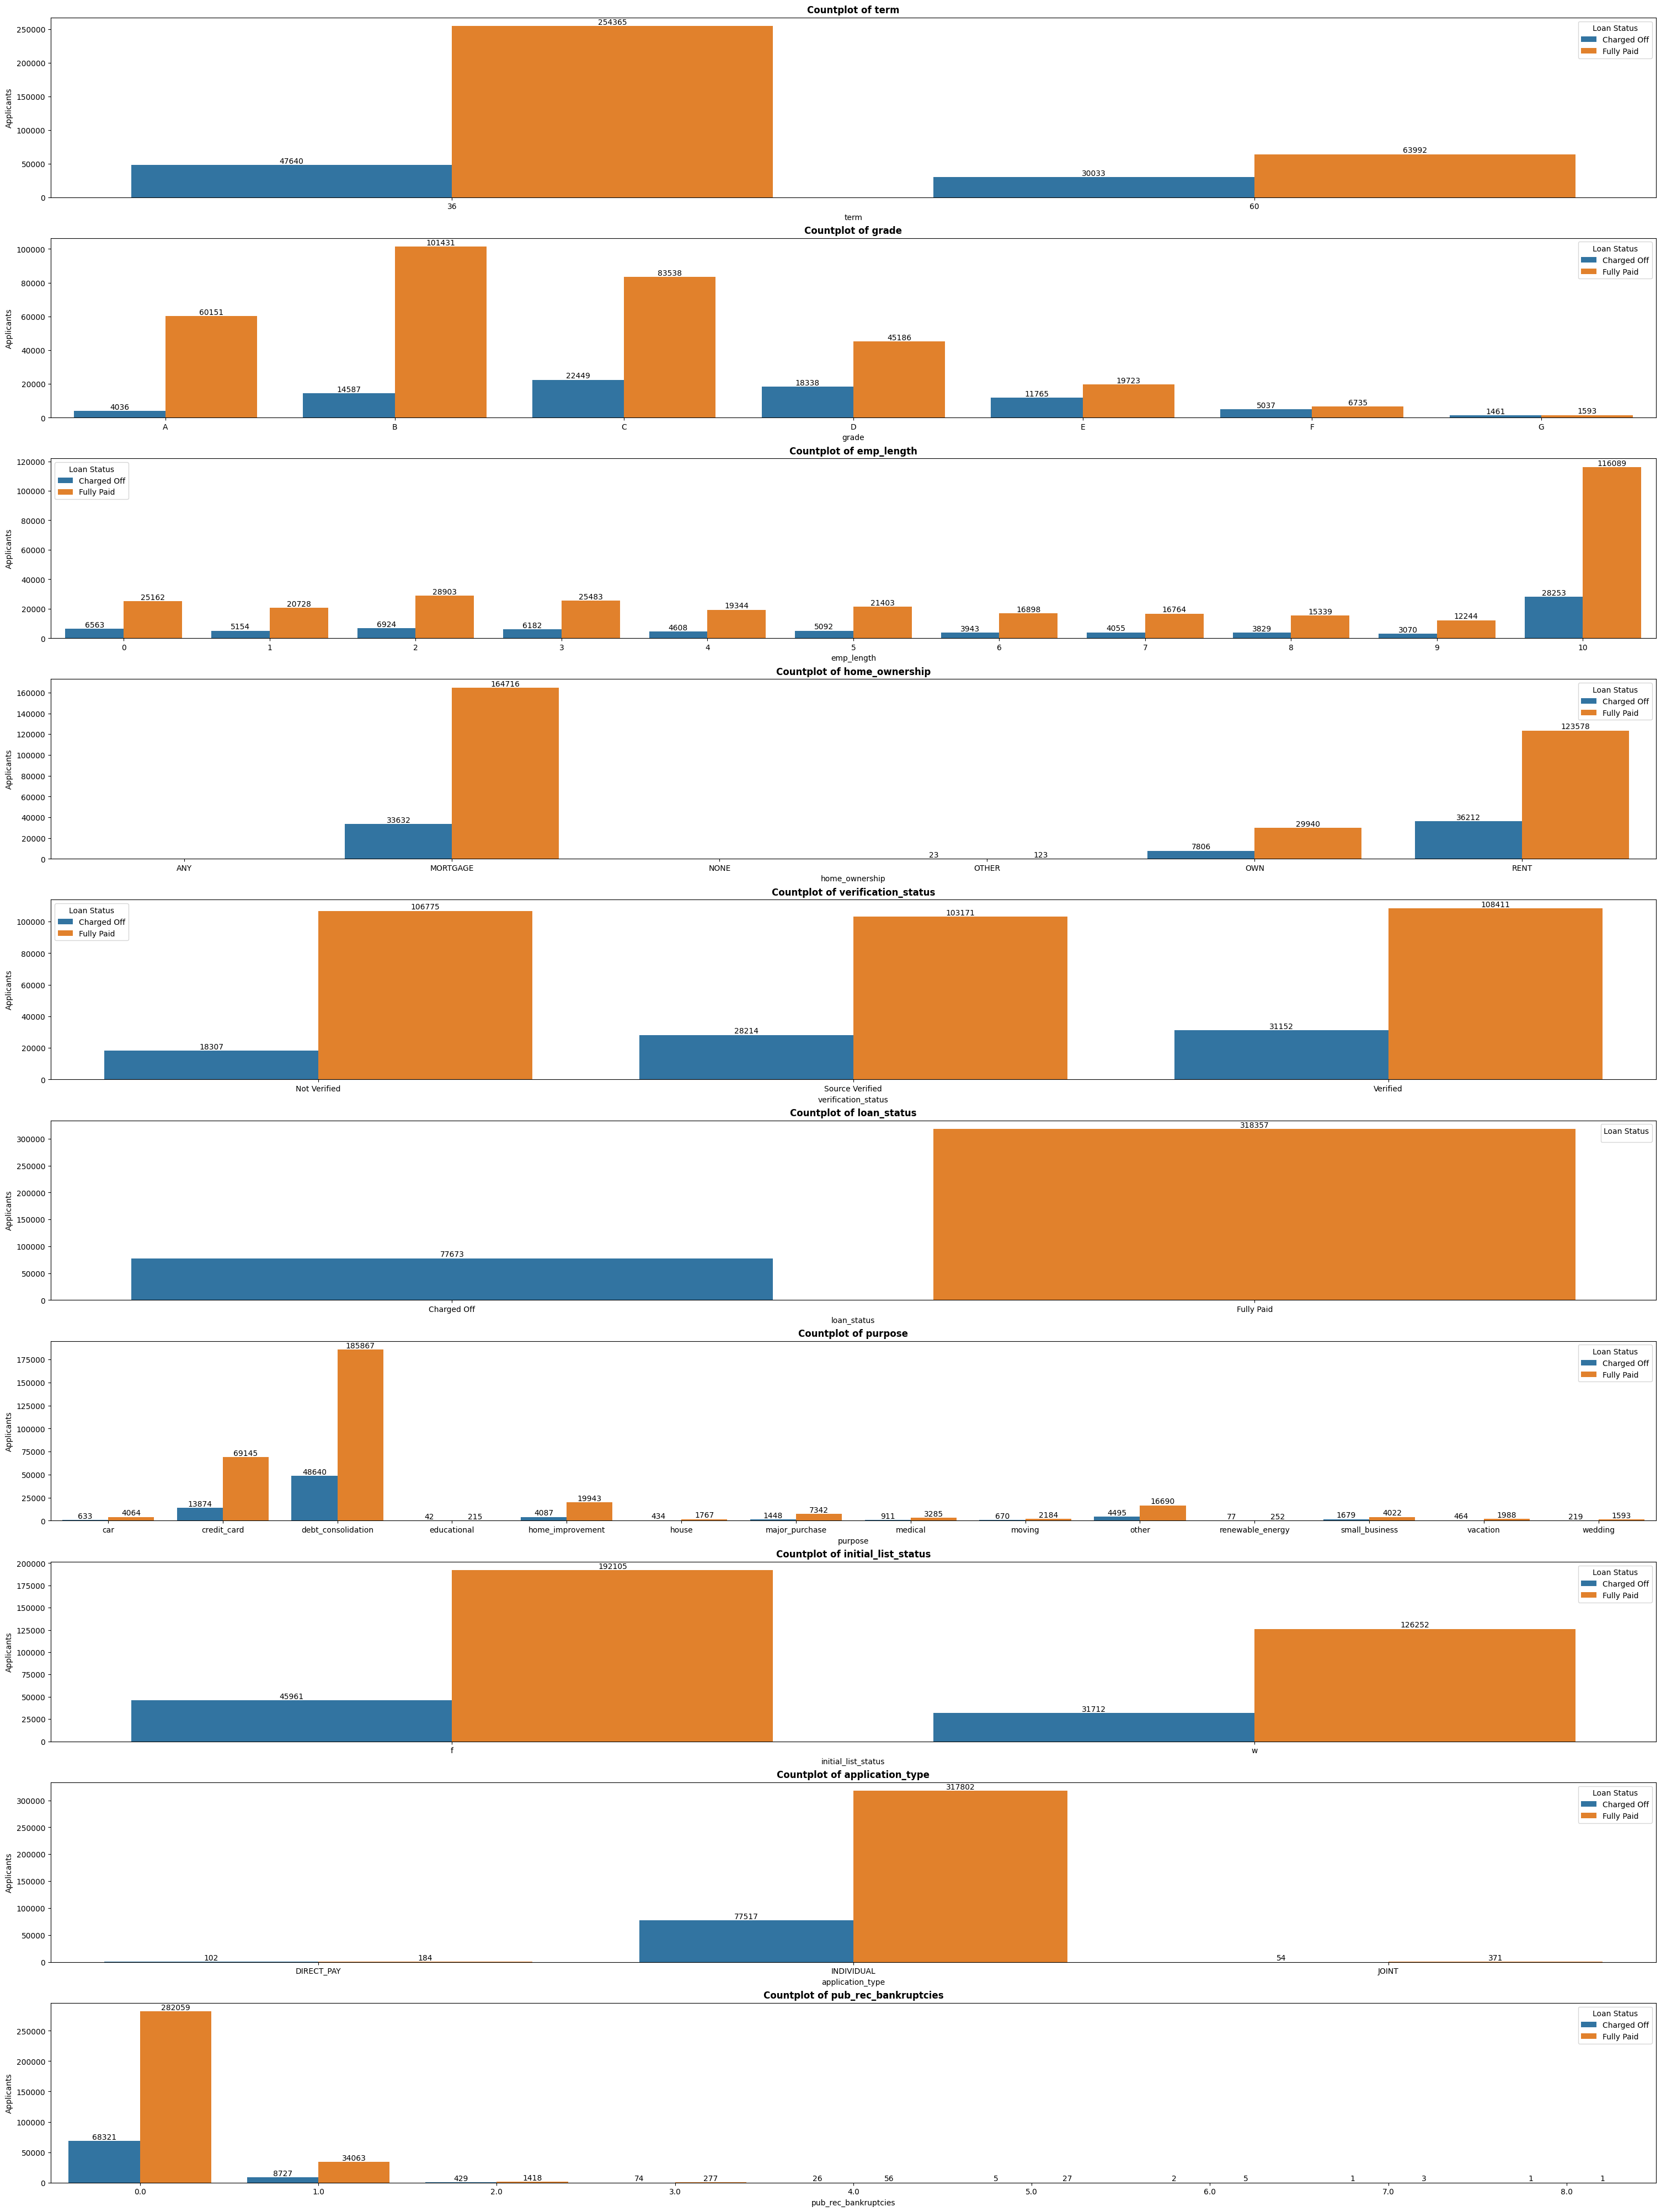

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=len(category_columns), ncols=1, figsize=(30, 40), constrained_layout=True)

for i in range(len(category_columns)):
    # Countplot
    data = sns.countplot(data=df, x=df[category_columns[i]], ax=ax[i], hue="loan_status")
    for label in data.containers:
        data.bar_label(label)
    ax[i].set_title(f"Countplot of {category_columns[i]}", {'weight': 'bold'})
    ax[i].set_ylabel('Applicants')
    ax[i].legend(title="Loan Status")

plt.show()

Insight :

*  The percentage of defaulters is much higher for longer (60-month) term

*   As expected, grade/sub-grade has the maximum impact on loan_status with highest grade having maximum defaulters
*   Direct pay application type has higher default rate compared to individual or joint




# **5. Data Preprocessing :**

In [ ]:
#final_df = df.copy()

In [ ]:
#df.head()

## **5.1 Removing Unwanted Features**

In [ ]:
#df=final_df.copy()

In [ ]:
unwanted_features = ['title','revol_util','emp_title','pub_rec_bankruptcies']
df.drop(unwanted_features,axis = 1,inplace=True)

In [ ]:
#df.head()

## **5.2 Handling the Null Values :**

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
mort_acc,37795
loan_amnt,0
term,0
application_type,0
initial_list_status,0
total_acc,0
revol_bal,0
pub_rec,0
open_acc,0
earliest_cr_line,0


In [ ]:
#Since there are many null values for mort_acc. So we replace with the total account hold by the borrower
test_df=df.groupby('total_acc')['mort_acc'].mean().round()
def update_mort(dfm):
  if np.isnan(dfm['mort_acc']):
    return test_df[dfm['total_acc']]
  else:
    return dfm['mort_acc']

df['mort_acc'] = df.apply(update_mort,axis=1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address
0,10000.0,36,11.44,B,B4,10,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,26.24,1990-06-01,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,B,B5,4,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,22.05,2004-07-01,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,3.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,B,B3,0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,12.79,2007-08-01,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,A,A2,6,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,2.60,2006-09-01,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,C,C5,9,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,33.95,1999-03-01,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,1.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## **5.3 Outlier Treatment :**

In [ ]:
final_df2 = df.copy()

In [ ]:
df = final_df2.copy()

In [ ]:
columns_with_outliers = list()
def detect_outliers_iqr(df):
  numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
  for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check for outliers
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if len(outlier_values) > 0:
      columns_with_outliers.append(col)


detect_outliers_iqr(df)
print("Columns with outliers : ",columns_with_outliers)

Columns with outliers :  ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc']


In [ ]:
df.shape

(396030, 22)

In [ ]:
#Remove the outliers
for cols in columns_with_outliers:
  mean = df[cols].mean()
  std = df[cols].std()

  upper_limit = mean + 3 * std
  lower_limit = mean - 3 * std

  df = df[(df[cols]<upper_limit) & (df[cols]>lower_limit)]

In [ ]:
df.shape

(365540, 22)

## **5.4 Feature Engineering :**

In [ ]:
#get the pincodes
df['address']

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...
396025,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
final_df3 = df.copy()

In [ ]:
def get_pin(x):
  return x[-5:]
df['pincode'] = df['address'].apply(get_pin)

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address,pincode
0,10000.0,36,11.44,B,B4,10,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,26.24,1990-06-01,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690
1,8000.0,36,11.99,B,B5,4,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,22.05,2004-07-01,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,3.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113
2,15600.0,36,10.49,B,B3,0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,12.79,2007-08-01,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",05113
3,7200.0,36,6.49,A,A2,6,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,2.60,2006-09-01,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",00813
4,24375.0,60,17.27,C,C5,9,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,33.95,1999-03-01,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,1.0,"679 Luna Roads\r\nGreggshire, VA 11650",11650


In [ ]:
#Change the Intial status to a nummeric value
status = {'w':0,'f':1}
#.map({'Fully Paid': 0, 'Charged Off':1}).astype(int)
df['initial_list_status']=df['initial_list_status'].map({'w':0,'f':1}).astype(int)

##**5.4 Remove the unwanted columns**


In [ ]:
df.drop(columns=['issue_d','sub_grade', 'earliest_cr_line','address'], axis=1, inplace=True)

In [ ]:
#df_final = df.copy()

## **5.5 Data preparation for modeling :**

In [ ]:
# Encoding Target Variable
df['loan_status']=df['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

In [ ]:
#Target Encoding the term
mean_loan = df.groupby('term')['loan_status'].mean()
df['term'] = df['term'].map(mean_loan)

In [ ]:
df.nunique()

,0
loan_amnt,1390
term,2
int_rate,540
grade,7
emp_length,11
home_ownership,4
annual_inc,25292
verification_status,3
loan_status,2
purpose,14


In [ ]:
df_encoded = pd.get_dummies(df, columns=['grade', 'emp_length', 'home_ownership','verification_status','purpose','application_type','pincode'],drop_first=True,dtype = int)

In [ ]:
df_encoded.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,mort_acc,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_10,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,pincode_05113,pincode_11650,pincode_22690,pincode_29597,pincode_30723,pincode_48052,pincode_70466,pincode_86630,pincode_93700
0,10000.0,0.158458,11.44,117000.0,0,26.24,16.0,0.0,36369.0,25.0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,0.158458,11.99,65000.0,0,22.05,17.0,0.0,20131.0,27.0,1,3.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,15600.0,0.158458,10.49,43057.0,0,12.79,13.0,0.0,11987.0,26.0,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,0.158458,6.49,54000.0,0,2.60,6.0,0.0,5472.0,13.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24375.0,0.322673,17.27,55000.0,1,33.95,13.0,0.0,24584.0,43.0,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Feature and Target column
X = df_encoded.drop(["loan_status"],axis = 1)
y = df_encoded["loan_status"]

# **6.Model Training**

In [ ]:
X.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,mort_acc,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_10,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,pincode_05113,pincode_11650,pincode_22690,pincode_29597,pincode_30723,pincode_48052,pincode_70466,pincode_86630,pincode_93700
0,10000.0,0.158458,11.44,117000.0,26.24,16.0,0.0,36369.0,25.0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,0.158458,11.99,65000.0,22.05,17.0,0.0,20131.0,27.0,1,3.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,15600.0,0.158458,10.49,43057.0,12.79,13.0,0.0,11987.0,26.0,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,0.158458,6.49,54000.0,2.60,6.0,0.0,5472.0,13.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24375.0,0.322673,17.27,55000.0,33.95,13.0,0.0,24584.0,43.0,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
y.head()

,loan_status
0,0
1,0
2,0
3,0
4,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365540 entries, 0 to 396029
Data columns (total 58 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   loan_amnt                            365540 non-null  float64 
 1   term                                 365540 non-null  category
 2   int_rate                             365540 non-null  float64 
 3   annual_inc                           365540 non-null  float64 
 4   dti                                  365540 non-null  float64 
 5   open_acc                             365540 non-null  float64 
 6   pub_rec                              365540 non-null  float64 
 7   revol_bal                            365540 non-null  float64 
 8   total_acc                            365540 non-null  float64 
 9   initial_list_status                  365540 non-null  int64   
 10  mort_acc                             365540 non-null  float64 
 11  grade

In [ ]:
X['term'] = X['term'].astype('int')

In [ ]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (292432, 58)
X_test shape: (73108, 58)
y_train shape: (292432,)
y_test shape: (73108,)


In [ ]:
#Count the occurence of loans approved and rejected
y_train.value_counts()

,count
loan_status,
0,234900
1,57532


In [ ]:
#Since approved loans are less(imba;aced data), we need to do some operations to increase data points for loans approved. One way is using SMOTE
smt = SMOTE(random_state = 42)
X_train_smt,y_train_smt = smt.fit_resample(X_train,y_train)

In [ ]:
print("Count of Loans Approved : 0 before sampling : ",y_train.value_counts()[0])
print("Count of Loans Approved : 1 before sampling : ",y_train.value_counts()[1])
print("Count of Loans Approved : 0 after sampling : ",y_train_smt.value_counts()[0])
print("Count of Loans Approved : 1 after sampling : ",y_train_smt.value_counts()[1])

Count of Loans Approved : 0 before sampling :  234900
Count of Loans Approved : 1 before sampling :  57532
Count of Loans Approved : 0 after sampling :  234900
Count of Loans Approved : 1 after sampling :  234900


## **6.1 Logistic Regression**

In [ ]:
# Feature Scaling
scaler = MinMaxScaler()
X_train_smt = pd.DataFrame(scaler.fit_transform(X_train_smt),columns = X_train_smt.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [ ]:
X_train_smt

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,mort_acc,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_10,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,pincode_05113,pincode_11650,pincode_22690,pincode_29597,pincode_30723,pincode_48052,pincode_70466,pincode_86630,pincode_93700
0,0.107632,0.0,0.211814,0.181102,0.415840,0.615385,0.000000,0.228367,0.771930,1.0,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.221787,0.0,0.032764,0.350394,0.133460,0.307692,0.000000,0.137318,0.228070,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.557078,0.0,0.359483,0.183071,0.223891,0.423077,0.000000,0.115580,0.438596,1.0,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.143509,0.0,0.293032,0.201528,0.276546,0.538462,0.000000,0.130400,0.350877,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.182648,0.0,0.430549,0.098425,0.168757,0.153846,0.000000,0.028917,0.228070,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469795,0.194176,0.0,0.487489,0.200787,0.246110,0.297917,0.290976,0.109504,0.253303,0.0,0.083136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469796,0.260719,0.0,0.472418,0.181102,0.446320,0.532967,0.000000,0.271462,0.675300,0.0,0.564626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469797,0.174821,0.0,0.600602,0.122047,0.338208,0.377969,0.000000,0.104053,0.327270,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469798,0.609623,0.0,0.616878,0.250153,0.252820,0.440809,0.000000,0.472522,0.349510,1.0,0.439702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,mort_acc,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_10,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,pincode_05113,pincode_11650,pincode_22690,pincode_29597,pincode_30723,pincode_48052,pincode_70466,pincode_86630,pincode_93700
0,0.300065,0.0,0.141671,0.212598,0.213390,0.384615,1.0,0.127998,0.280702,1.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.300065,0.0,0.204892,0.102362,0.162194,0.230769,0.0,0.110616,0.192982,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.255708,0.0,0.202584,0.742126,0.230893,0.730769,0.0,0.020378,0.491228,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.117417,0.0,0.177665,0.161417,0.053238,0.192308,1.0,0.052131,0.175439,1.0,0.285714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.404436,0.0,0.330872,0.206299,0.243582,0.461538,0.0,0.209060,0.614035,1.0,0.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73103,0.279191,0.0,0.907707,0.417323,0.143086,0.730769,1.0,0.227006,0.508772,1.0,0.142857,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73104,0.508806,0.0,0.119059,0.811024,0.087077,0.192308,0.0,0.055055,0.350877,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
73105,0.247880,0.0,0.461006,0.212598,0.392940,0.576923,1.0,0.058600,0.333333,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73106,0.352250,0.0,0.353946,0.417323,0.464119,0.730769,0.0,0.395731,0.543860,0.0,0.285714,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.shape

(292432,)

In [ ]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)
y_pred = model.predict(X_test)

In [ ]:
#Training Accuracy
print('Train Accuracy :',np.round(model.score(X_train,y_train),2))

Train Accuracy : 0.8


In [ ]:
# Model Performance
print('Accuracy :',np.round(model.score(X_test,y_test),2))
print('F1 Score:',np.round(f1_score(y_test,y_pred),2))
print('Recall Score:',np.round(recall_score(y_test,y_pred),2))
print('Precision Score:',np.round(precision_score(y_test,y_pred),2))

Accuracy : 0.87
F1 Score: 0.59
Recall Score: 0.48
Precision Score: 0.76


In [ ]:
#Coefficients of the features

coef_list = model.coef_.tolist()
coef_list=np.array(model.coef_.tolist()).reshape(-1).tolist()
i=0
print("Co-efficient for features")
for cols in X_train_smt.columns:
  print(cols," :",coef_list[i])
  i+=1

Co-efficient for features
loan_amnt  : 1.0905945258824223
term  : 0.0
int_rate  : 7.655950784281975
annual_inc  : -1.223605185391974
dti  : 2.362251472999668
open_acc  : 0.4147080540824006
pub_rec  : 0.2057270231111327
revol_bal  : -0.013691741333040599
total_acc  : -0.5433364538532353
initial_list_status  : -0.37397894948105537
mort_acc  : -0.07269691336392217
grade_B  : -1.6702371494859098
grade_C  : -2.091333986942299
grade_D  : -2.8194138144311376
grade_E  : -3.5489239901163976
grade_F  : -4.500797777625332
grade_G  : -4.890711807215241
emp_length_1  : -1.694350593744775
emp_length_2  : -1.7156903449445269
emp_length_3  : -1.7107384114194895
emp_length_4  : -1.731561932683369
emp_length_5  : -1.7649154793297817
emp_length_6  : -1.7979736411855682
emp_length_7  : -1.746778301702357
emp_length_8  : -1.761159368392992
emp_length_9  : -1.7071525846515112
emp_length_10  : -1.5142640829690528
home_ownership_MORTGAGE  : -5.362906156046326
home_ownership_NONE  : 0.0
home_ownership_OTHER  :

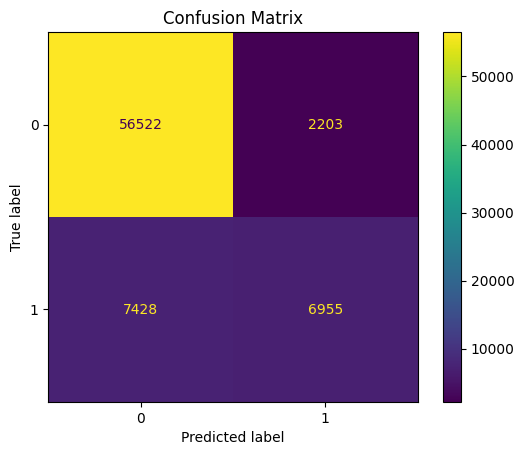

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     58725
           1       0.76      0.48      0.59     14383

    accuracy                           0.87     73108
   macro avg       0.82      0.72      0.76     73108
weighted avg       0.86      0.87      0.86     73108



**Insights:**
* It can be observed that the precision is high, which indicates that we are able to say that we are able to give loans to trusted persons.
* The precision is for class 0 and class 1 are very high.
* From the confusion matrix, the TN is very high which indicates that we are able to detect teh defaulters.

**ROC Curve and AUC :**

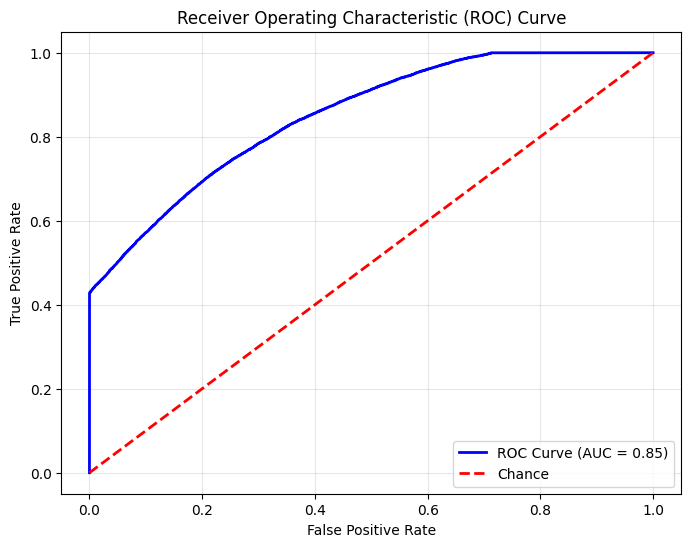

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


**PR Curve**

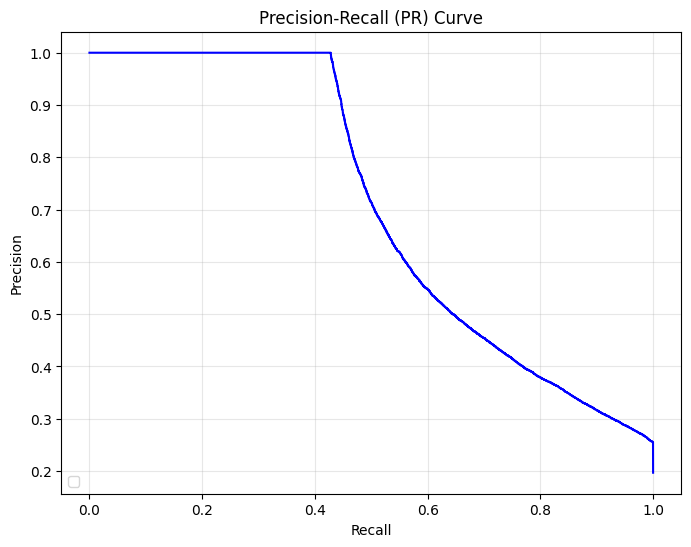

In [ ]:

precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
#avg_precision = average_precision_score(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')#, lw=2, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')
plt.grid(alpha=0.3)
plt.show()

**Insights:**

* Precision Curve attains its highest value when recall is around .49.
* Area under Precision Recall curve can be improved by hyperparameter tuning.

# **7. Recommendations**
The objective of this model was to balance the risk of NPAs and the opportunity to earn interest.

The strategies that we can take:

* Maximize F1 score.

* Optimize Precision-Recall Curve.

Approaches to be taken:

1.   Disburse loans to slightly higher-risk customers to maximize earnings.
2.   Verify proof of assets, especially since verified borrowers may have a higher default probability.
3.  Avoid loans to borrowers without property, as they have a higher default probability.


# **8. Tradeoff Questions:**
**1.** How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

**Answer:** We need to gather informations and create abalanced data set.We also need to increase the presicion score as well.The implementation of this strategy will minimize false positives, thereby ensuring that the company does not miss opportunities to finance deserving individuals.


**2.** Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

**Answer:** Recall is the best option to deal in this situations. This will help to reduce the FN which help us detecting the fraudstars.